# Amazon reviews

Word cloud

In [33]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
df = pd.read_csv("amazon_reviews/train.csv")

In [11]:
df.columns

Index(['2', 'Stuning even for the non-gamer',
       'This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'],
      dtype='object')

In [10]:
columns = ['polarity','title','text']

In [12]:
df.columns = columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599999 entries, 0 to 3599998
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   polarity  int64 
 1   title     object
 2   text      object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [13]:
df.head()

,polarity,title,text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [18]:
# Review if dataset is balanced
df.polarity.value_counts()

1    1800000
2    1799999
Name: polarity, dtype: int64

### WordCloud

Make a word cloud with just one review

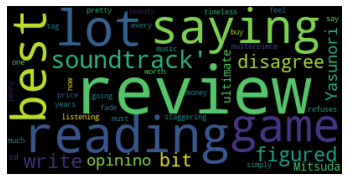

In [21]:
# Start with one review:
text = df.text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

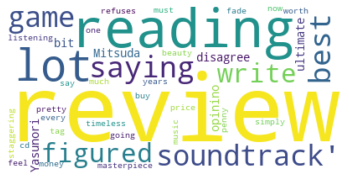

In [23]:
wordcloud = WordCloud(max_font_size=150, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
wordcloud.to_file('img/first_review.png')

Make it with more reviews

In [48]:
#text = " ".join(review for review in df.text[:500])
text = " ".join(review for review in df.text)

In [53]:
len(text[:500000])

500000

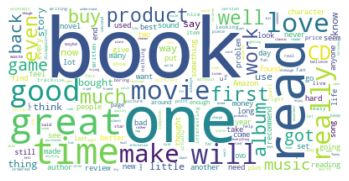

In [55]:
# Create a stopword list:
stopwords = set(STOPWORDS)

# Generate a wordcloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(text[:1000000])

# Display word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis(False)
plt.show()

### Apply an image mask

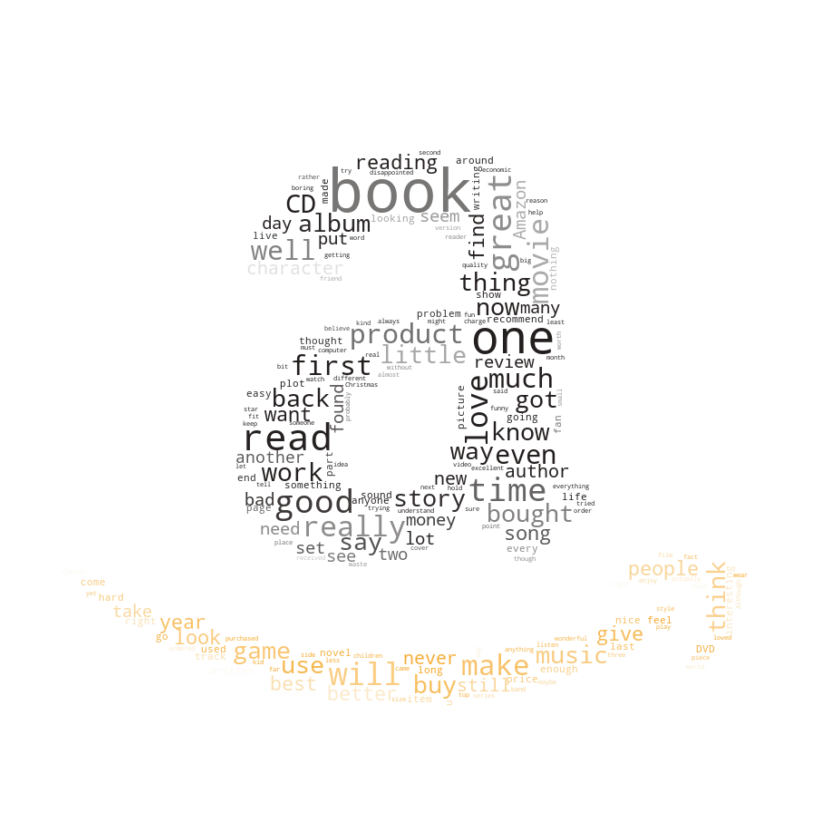

In [56]:
# Generate a word cloud image
mask = np.array(Image.open("Img/amazon.jpg"))

# Generate word cloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', mode='RGBA', mask=mask).generate(text[:1000000])

# Create coloring from image
image_color = ImageColorGenerator(mask)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud.recolor(color_func=image_color), interpolation='bilinear')
plt.axis('off')

# Store to file
plt.savefig('Img/amazon_wordcloud.png', format='png')